# Demo of `LaPDXYTransform`

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.rcParams["figure.figsize"] = [10.5, 0.56 * 10.5]

In [3]:
try:
    from bapsf_motion.transform import LaPDXYTransform
except ModuleNotFoundError:
    from pathlib import Path

    HERE = Path().cwd()
    BAPSF_MOTION = (HERE / ".." / ".." / ".." / "src").resolve()
    sys.path.append(str(BAPSF_MOTION))
    
    from bapsf_motion.transform import LaPDXYTransform

In [15]:
tr = LaPDXYTransform(
    ("x", "y"),
    pivot_to_center=57.288,
    pivot_to_drive=30.0,
)

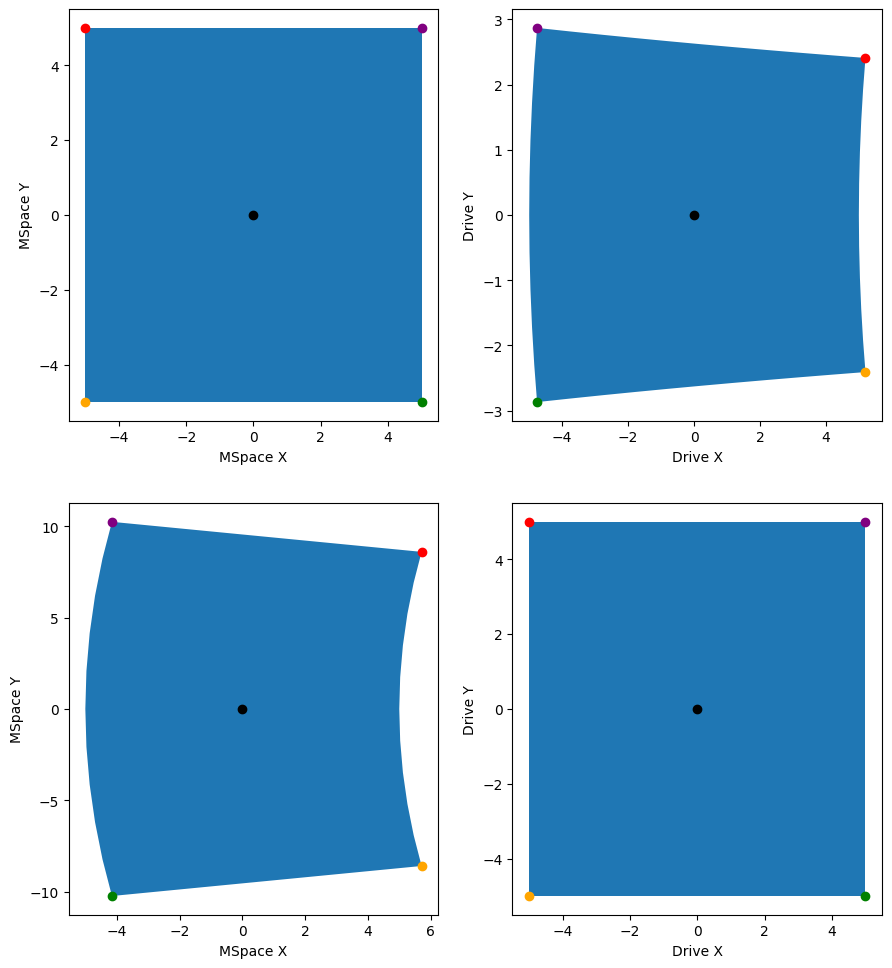

In [16]:
figwidth, figheight = plt.rcParams["figure.figsize"]
figheight = 2.0 * figheight
fig, axs = plt.subplots(2, 2, figsize=[figwidth, figheight])

axs[0,0].set_xlabel("MSpace X")
axs[0,0].set_ylabel("MSpace Y")
axs[0,1].set_xlabel("Drive X")
axs[0,1].set_ylabel("Drive Y")


points = np.zeros((40, 2))
points[0:10, 0] = np.linspace(-5, 5, num=10, endpoint=False)
points[0:10, 1] = 5 * np.ones(10)
points[10:20, 0] = 5 * np.ones(10)
points[10:20, 1] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 0] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 1] = -5 * np.ones(10)
points[30:40, 0] = -5 * np.ones(10)
points[30:40, 1] = np.linspace(-5, 5, num=10, endpoint=False)

dpoints = tr.convert(points, to_coords="drive")

axs[0,0].fill(points[...,0], points[...,1])
axs[0,1].fill(dpoints[...,0], dpoints[...,1])

for pt, color in zip(
    [
        [-5, 5],
        [-5, -5],
        [5, -5],
        [5, 5],
        [0, 0]
    ],
    ["red", "orange", "green", "purple", "black"]
):
    dpt = tr.convert(pt, to_coords="drive")
    axs[0,0].plot(pt[0], pt[1], 'o', color=color)
    axs[0,1].plot(dpt[0], dpt[1], 'o', color=color)

##

axs[1,0].set_xlabel("MSpace X")
axs[1,0].set_ylabel("MSpace Y")
axs[1,1].set_xlabel("Drive X")
axs[1,1].set_ylabel("Drive Y")


points = np.zeros((40, 2))
points[0:10, 0] = np.linspace(-5, 5, num=10, endpoint=False)
points[0:10, 1] = 5 * np.ones(10)
points[10:20, 0] = 5 * np.ones(10)
points[10:20, 1] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 0] = np.linspace(5, -5, num=10, endpoint=False)
points[20:30, 1] = -5 * np.ones(10)
points[30:40, 0] = -5 * np.ones(10)
points[30:40, 1] = np.linspace(-5, 5, num=10, endpoint=False)

mpoints = tr.convert(points, to_coords="motion_space")

axs[1,1].fill(points[...,0], points[...,1])
axs[1,0].fill(mpoints[...,0], mpoints[...,1])

for pt, color in zip(
    [
        [-5, 5],
        [-5, -5],
        [5, -5],
        [5, 5],
        [0, 0]
    ],
    ["red", "orange", "green", "purple", "black"]
):
    mpt = tr.convert(pt, to_coords="motion_space")
    axs[1,0].plot(mpt[0], mpt[1], 'o', color=color)
    axs[1,1].plot(pt[0], pt[1], 'o', color=color)

In [5]:
tr.matrix((1.0, 0.0))

array([[-1.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [37]:
pivot_to_drive=40.0
pivot_to_center=57.288
points = np.array([[1.0, 0.0], [0.0, 1.0], [2.5, 2.5]])

theta = np.arctan(points[..., 1] / pivot_to_drive)
theta

array([0.        , 0.02499479, 0.06241881])

In [38]:
npoints = 1 if points.ndim == 1 else points.shape[0]
matrix = np.zeros((npoints, 3, 3)).squeeze()
matrix[..., 0, 0] = -np.cos(theta)
matrix[..., 0, 2] = pivot_to_center * (1.0 - np.cos(theta))
matrix[..., 1, 0] = np.sin(theta)
matrix[..., 1, 2] = pivot_to_center * np.sin(theta)
matrix[..., 2, 2] = 1.0

matrix

array([[[-1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[-0.99968765,  0.        ,  0.01789411],
        [ 0.02499219,  0.        ,  1.43175265],
        [ 0.        ,  0.        ,  1.        ]],

       [[-0.99805258,  0.        ,  0.11156388],
        [ 0.06237829,  0.        ,  3.57352726],
        [ 0.        ,  0.        ,  1.        ]]])

In [39]:
p2 = np.concatenate(
    (
        points,
        np.ones((points.shape[0], 1))
    ),
    axis=1,
)
p2

array([[1. , 0. , 1. ],
       [0. , 1. , 1. ],
       [2.5, 2.5, 1. ]])

In [48]:
np.einsum("kmn,kn->km", matrix, p2)[...,:2]

array([[-1.        ,  0.        ],
       [ 0.01789411,  1.43175265],
       [-2.38356756,  3.72947297]])

In [41]:
np.matmul(matrix[0,...], p2[0, ...])

array([-1.,  0.,  1.])

In [46]:
np.concatenate(([2, 3], [1]), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1